## BÀI 2.1.3:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

/tmp/ipython-input-3549350853.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Điền tuổi thiếu bằng median
/tmp/ipython-input-3549350853.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

Best DT params: {'max_depth': 3}
Best DT Accuracy: 0.7988826815642458


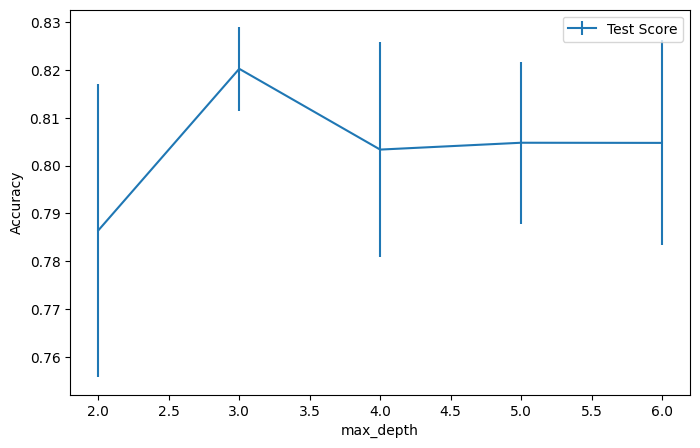

RF Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Best RF params: {'n_estimators': 50}
Best RF Accuracy: 0.8100558659217877


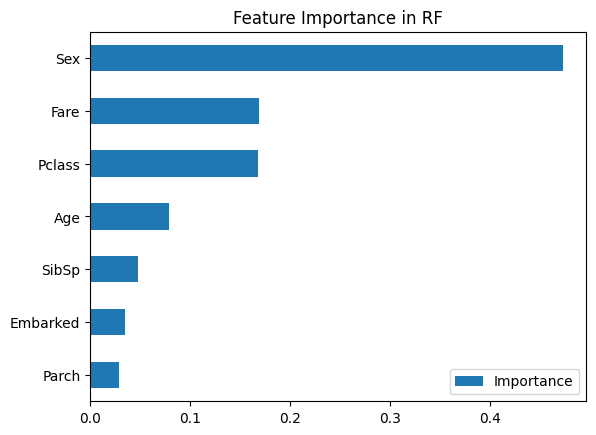

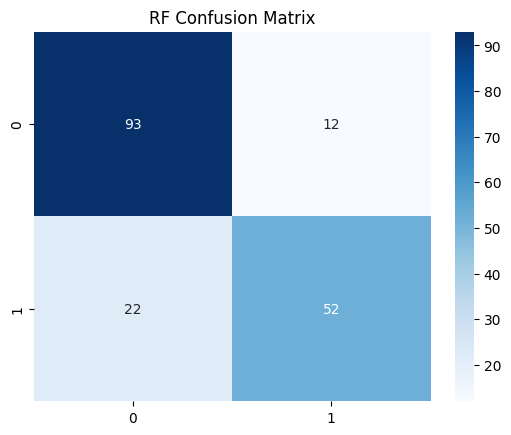

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz  # Để vẽ cây

# 1. Tải và khám phá dữ liệu
df = pd.read_csv('/content/train.csv')  # Thay bằng đường dẫn file của bạn
print(df.head())
print(df.isnull().sum())  # Kiểm tra missing values

# Tiền xử lý
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)  # Loại bỏ features không liên quan
df['Age'].fillna(df['Age'].median(), inplace=True)  # Điền tuổi thiếu bằng median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Điền Embarked thiếu

# Mã hóa categorical
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
le_emb = LabelEncoder()
df['Embarked'] = le_emb.fit_transform(df['Embarked'])

features = df.drop('Survived', axis=1)
target = df['Survived']

# 2. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Nhiệm vụ 1: Xây dựng Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("DT Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# Vẽ cây
dot_data = export_graphviz(dt, out_file=None, filled=True, rounded=True,
                           feature_names=features.columns, class_names=['Died', 'Survived'])
graph = graphviz.Source(dot_data)
graph.render('dt_titanic')  # Lưu file .pdf

# Tối ưu hóa max_depth bằng GridSearchCV
params_dt = {'max_depth': [2, 3, 4, 5, 6]}
cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params_dt, cv=5, scoring='accuracy')
cv_dt.fit(X_train, y_train)
print("Best DT params:", cv_dt.best_params_)
best_dt = cv_dt.best_estimator_
best_dt_pred = best_dt.predict(X_test)
print("Best DT Accuracy:", accuracy_score(y_test, best_dt_pred))

# Vẽ biểu đồ đánh giá
cv_results = pd.DataFrame(cv_dt.cv_results_)
plt.figure(figsize=(8, 5))
plt.errorbar(cv_results['param_max_depth'], cv_results['mean_test_score'],
             yerr=cv_results['std_test_score'], label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Nhiệm vụ 2: Xây dựng Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Tối ưu hóa n_estimators
params_rf = {'n_estimators': [10, 50, 100, 150]}
cv_rf = GridSearchCV(RandomForestClassifier(max_depth=3, random_state=42), param_grid=params_rf, cv=5, scoring='accuracy')
cv_rf.fit(X_train, y_train)
print("Best RF params:", cv_rf.best_params_)
best_rf = cv_rf.best_estimator_
best_rf_pred = best_rf.predict(X_test)
print("Best RF Accuracy:", accuracy_score(y_test, best_rf_pred))

# Feature importance
feat_imp = pd.DataFrame({'Importance': best_rf.feature_importances_}, index=features.columns)
feat_imp.sort_values('Importance', ascending=True).plot.barh()
plt.title('Feature Importance in RF')
plt.show()

# Confusion Matrix cho RF
cm = confusion_matrix(y_test, best_rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RF Confusion Matrix')
plt.show()

## BÀI 2.1.4:

Tên các cột: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
5 dòng đầu:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Kiểu dữ liệu:
 gender                  object
age                    float64
hypertension             int64
heart_disease          

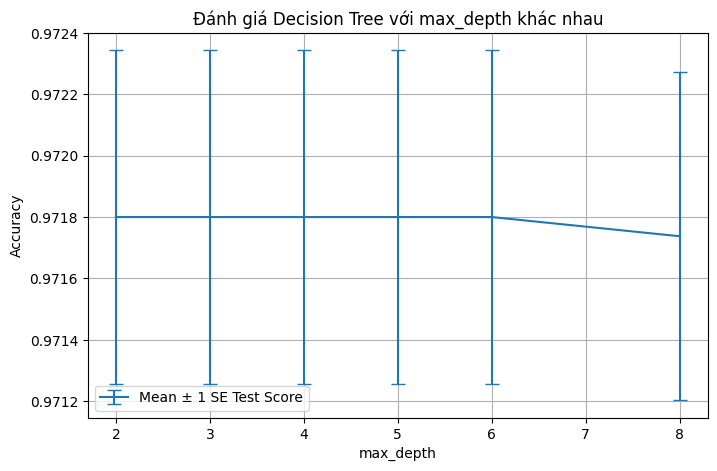


=== Random Forest Results ===
RF Accuracy: 0.9675
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       1.00      0.62      0.77      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.81      0.87     20000
weighted avg       0.97      0.97      0.96     20000

Best RF params: {'n_estimators': 200}
Best RF Accuracy: 0.97215


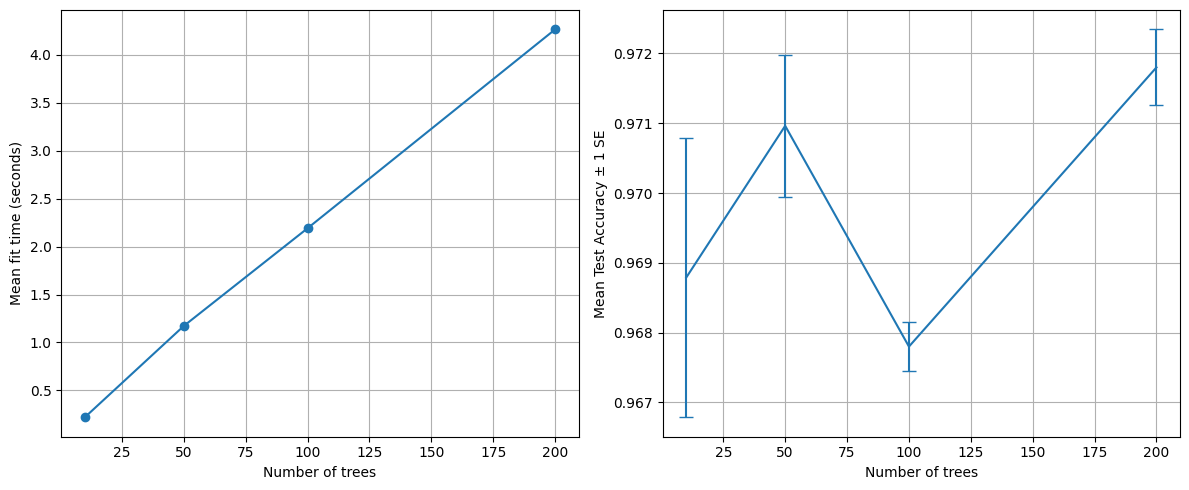

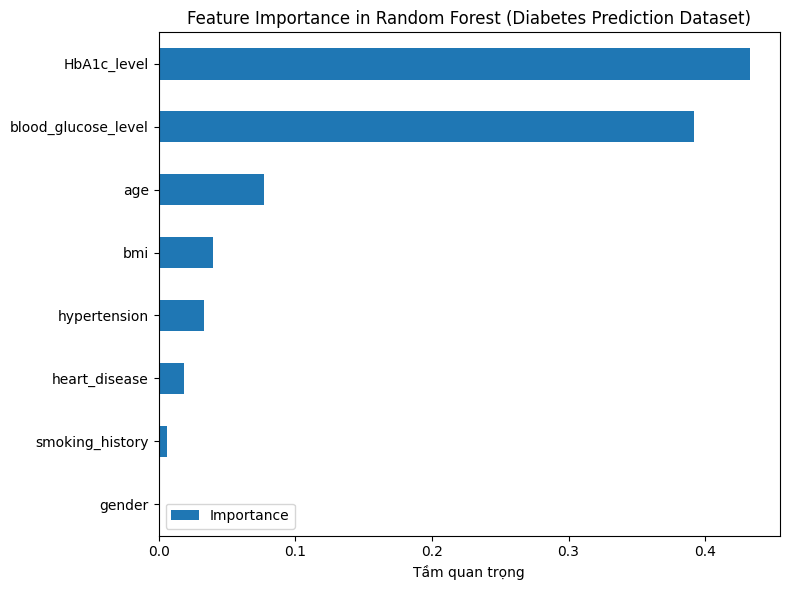


=== Hoàn thành! ===
Features quan trọng nhất (top 3):
                     Importance
age                    0.076773
blood_glucose_level    0.391899
HbA1c_level            0.433115


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')  # Tắt warning không cần thiết

# 1. Tải dữ liệu với debug
df = pd.read_csv('diabetes_prediction_dataset.csv')  # Thay bằng tên file thực tế nếu khác

print("Tên các cột:", df.columns.tolist())
print("5 dòng đầu:\n", df.head())
print("\nKiểu dữ liệu:\n", df.dtypes)
print("\nSố lượng missing values:\n", df.isnull().sum())

# Xác định target: Ưu tiên 'diabetes', fallback cột cuối nếu binary
if 'diabetes' in df.columns:
    target_col = 'diabetes'
elif len(df.columns) > 0 and df.iloc[:, -1].nunique() == 2:
    target_col = df.columns[-1]
    print(f"Cảnh báo: Không tìm thấy 'diabetes', dùng cột '{target_col}' làm target.")
else:
    raise ValueError("Không tìm thấy cột target binary! Kiểm tra file dữ liệu.")

features = df.drop(target_col, axis=1)
target = df[target_col]

print(f"\nTarget column: {target_col}")
print(f"Phân bố target: \n{target.value_counts()}")

# 2. Tiền xử lý: Xử lý missing values và encode categorical
# Điền missing values (nếu có)
for col in features.columns:
    if features[col].dtype == 'object':  # Categorical
        features[col].fillna(features[col].mode()[0], inplace=True)  # Điền mode
    else:  # Numerical
        features[col].fillna(features[col].median(), inplace=True)  # Điền median

# Encode categorical columns
label_encoders = {}
for col in features.columns:
    if features[col].dtype == 'object':  # Chỉ encode string columns
        le = LabelEncoder()
        features[col] = le.fit_transform(features[col])
        label_encoders[col] = le
        print(f"Encoded column '{col}': Unique values after encoding: {features[col].nunique()}")

print("\nFeatures sau tiền xử lý:\n", features.dtypes)

# Scale features (bây giờ toàn bộ là số)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Nhiệm vụ 1: Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\n=== Decision Tree Results ===")
print("DT Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# Tối ưu hóa max_depth
params_dt = {'max_depth': [2, 3, 4, 5, 6, 8]}
cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params_dt, cv=5, scoring='accuracy')
cv_dt.fit(X_train, y_train)
print("Best DT params:", cv_dt.best_params_)
best_dt_pred = cv_dt.best_estimator_.predict(X_test)
print("Best DT Accuracy:", accuracy_score(y_test, best_dt_pred))

# Biểu đồ đánh giá DT
cv_results_df = pd.DataFrame(cv_dt.cv_results_)
plt.figure(figsize=(8, 5))
plt.errorbar(cv_results_df['param_max_depth'], cv_results_df['mean_test_score'],
             yerr=cv_results_df['std_test_score'], label='Mean ± 1 SE Test Score', capsize=5)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Đánh giá Decision Tree với max_depth khác nhau')
plt.legend()
plt.grid(True)
plt.show()

# Nhiệm vụ 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\n=== Random Forest Results ===")
print("RF Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Tối ưu hóa n_estimators
params_rf = {'n_estimators': [10, 50, 100, 200]}
cv_rf = GridSearchCV(RandomForestClassifier(max_depth=3, random_state=42), param_grid=params_rf, cv=5, scoring='accuracy')
cv_rf.fit(X_train, y_train)
print("Best RF params:", cv_rf.best_params_)
best_rf_pred = cv_rf.best_estimator_.predict(X_test)
print("Best RF Accuracy:", accuracy_score(y_test, best_rf_pred))

# Biểu đồ đánh giá RF (Fit Time vs. Accuracy)
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(cv_rf_results_df['param_n_estimators'], cv_rf_results_df['mean_fit_time'], 'o-')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[0].grid(True)

axs[1].errorbar(cv_rf_results_df['param_n_estimators'], cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score'], capsize=5)
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean Test Accuracy ± 1 SE')
axs[1].grid(True)
plt.tight_layout()
plt.show()

# Feature importance (sử dụng tên cột gốc)
feat_imp = pd.DataFrame({'Importance': cv_rf.best_estimator_.feature_importances_}, index=features.columns)
feat_imp_sorted = feat_imp.sort_values('Importance', ascending=True)
feat_imp_sorted.plot.barh(figsize=(8, 6))
plt.title('Feature Importance in Random Forest (Diabetes Prediction Dataset)')
plt.xlabel('Tầm quan trọng')
plt.tight_layout()
plt.show()

print("\n=== Hoàn thành! ===")
print("Features quan trọng nhất (top 3):")
print(feat_imp_sorted.tail(3))

## BÀI 2.2.3:

Dataset gốc: (100000, 9)
Dataset subsample: (21500, 9)
Tên các cột: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
5 dòng đầu:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  35.0             0              0         No Info  27.32   
1    Male  66.0             0              0         No Info  27.32   
2    Male  32.0             0              0           never  32.71   
3    Male  46.0             0              0         No Info  32.78   
4  Female  22.0             0              0           never  23.51   

   HbA1c_level  blood_glucose_level  diabetes  
0          3.5                  200         0  
1          4.5                  145         0  
2          6.6                   90         0  
3          4.0                   80         0  
4          4.5                  158         0  

Phân bố target: 
 diabetes
0    0.604651
1    0.395349
Name: proportion, dty

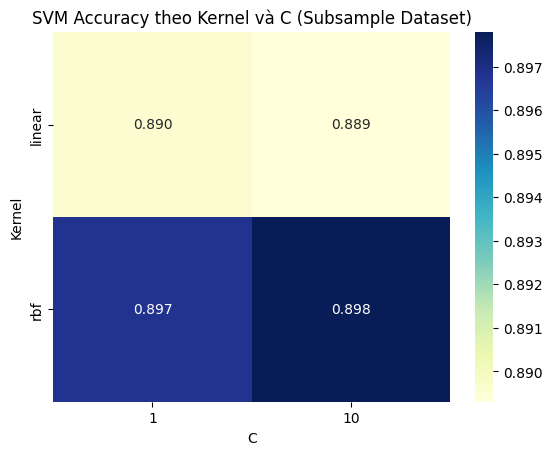

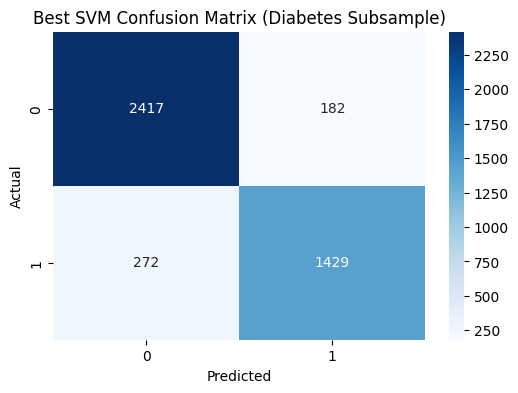


=== Hoàn thành! Thời gian ước tính: <3 phút với subsample. ===
Tips: Nếu muốn full dataset, dùng subsample lớn hơn (e.g., 50k) hoặc LinearSVC.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC  # Thêm LinearSVC cho nhanh
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# 1. Tải dữ liệu với debug và SUBSAMPLE (giảm kích thước để nhanh)
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')  # Đường dẫn của bạn

print("Dataset gốc:", df.shape)  # ~ (100000, 9)

# Subsample: Lấy 20,000 rows ngẫu nhiên, giữ balanced (diabetes ~0/1 tỷ lệ ~65/35)
df_sample = df.groupby('diabetes', group_keys=False).apply(lambda x: x.sample(min(len(x), 13000), random_state=42)).reset_index(drop=True)
# Hoặc subsample đơn giản: df_sample = df.sample(n=20000, random_state=42).reset_index(drop=True)
print("Dataset subsample:", df_sample.shape)  # ~ (20000, 9)

print("Tên các cột:", df_sample.columns.tolist())
print("5 dòng đầu:\n", df_sample.head())
print("\nPhân bố target: \n", df_sample['diabetes'].value_counts(normalize=True))

# Xác định target
target_col = 'diabetes'  # Xác nhận
features = df_sample.drop(target_col, axis=1)
target = df_sample[target_col]

# 2. Tiền xử lý (giống trước: fill missing + encode)
for col in features.columns:
    if features[col].dtype == 'object':
        features[col].fillna(features[col].mode()[0], inplace=True)
    else:
        features[col].fillna(features[col].median(), inplace=True)

label_encoders = {}
for col in features.columns:
    if features[col].dtype == 'object':
        le = LabelEncoder()
        features[col] = le.fit_transform(features[col])
        label_encoders[col] = le

print("\nFeatures sau tiền xử lý:\n", features.dtypes)

# Scale
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Chia train/test (test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
print("Train/Test shape:", X_train.shape, X_test.shape)

# 4. SVM cơ bản (RBF, nhanh với subsample)
svm = SVC(kernel='rbf', C=1, random_state=42, verbose=True)  # verbose=True để xem tiến độ
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("\n=== SVM Cơ Bản (RBF Kernel) ===")
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# 5. Tối ưu bằng GridSearchCV (GIẢM PARAMS ĐỂ NHANH: cv=3, ít options)
params_svm = {
    'kernel': ['linear', 'rbf'],  # Bỏ poly/sigmoid để nhanh
    'C': [1, 10]  # Giảm từ 3 xuống 2
}
cv_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid=params_svm,
    cv=3,  # Giảm từ 5 xuống 3 folds
    scoring='accuracy',
    verbose=2,  # Hiển thị tiến độ (0=không, 1=ít, 2=chi tiết)
    n_jobs=-1  # Dùng tất cả CPU cores
)
cv_svm.fit(X_train, y_train)
print("\nBest SVM params:", cv_svm.best_params_)
best_svm_pred = cv_svm.best_estimator_.predict(X_test)
print("Best SVM Accuracy:", accuracy_score(y_test, best_svm_pred))
print(classification_report(y_test, best_svm_pred))

# Nếu vẫn chậm, thử LinearSVC (nhanh hơn cho linear kernel)
print("\n=== LinearSVC (Nhanh hơn cho linear kernel) ===")
linear_svm = LinearSVC(C=1, random_state=42, max_iter=1000)
linear_svm.fit(X_train, y_train)
linear_pred = linear_svm.predict(X_test)
print("LinearSVC Accuracy:", accuracy_score(y_test, linear_pred))
print(classification_report(y_test, linear_pred))

# Biểu đồ đánh giá (tóm tắt cv_results)
cv_results_df = pd.DataFrame(cv_svm.cv_results_)
print("\nTóm tắt GridSearchCV (Mean Test Score):")
print(cv_results_df[['param_kernel', 'param_C', 'mean_test_score', 'std_test_score']].round(3))

# Heatmap Accuracy theo kernel/C
pivot_table = cv_results_df.pivot_table(values='mean_test_score', index='param_kernel', columns='param_C')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('SVM Accuracy theo Kernel và C (Subsample Dataset)')
plt.xlabel('C')
plt.ylabel('Kernel')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, best_svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Best SVM Confusion Matrix (Diabetes Subsample)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n=== Hoàn thành! Thời gian ước tính: <3 phút với subsample. ===")
print("Tips: Nếu muốn full dataset, dùng subsample lớn hơn (e.g., 50k) hoặc LinearSVC.")

## BÀI 2.2.4:

Tên các cột: ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']
5 dòng đầu:
   AnimalName symptoms1             symptoms2 symptoms3    symptoms4  \
0        Dog     Fever              Diarrhea  Vomiting  Weight loss   
1        Dog     Fever              Diarrhea  Coughing    Tiredness   
2        Dog     Fever              Diarrhea  Coughing     Vomiting   
3        Dog     Fever  Difficulty breathing  Coughing     Lethargy   
4        Dog     Fever              Diarrhea  Coughing     Lethargy   

     symptoms5 Dangerous  
0  Dehydration       Yes  
1        Pains       Yes  
2     Anorexia       Yes  
3     Sneezing       Yes  
4     Blue Eye       Yes  
Shape: (871, 7)

Kiểu dữ liệu:
 AnimalName    object
symptoms1     object
symptoms2     object
symptoms3     object
symptoms4     object
symptoms5     object
Dangerous     object
dtype: object
Số lượng missing values ban đầu:
 AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
s

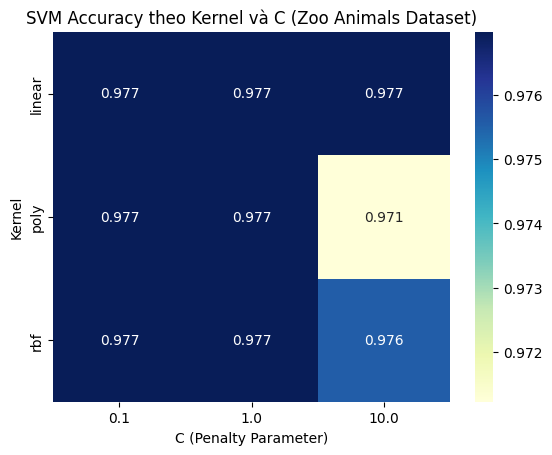

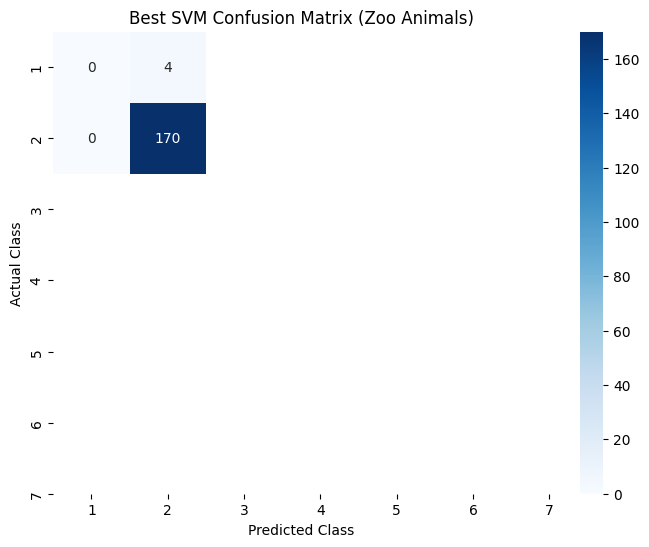


=== Hoàn thành! ===
Lưu ý: Nếu vẫn NaN, tải file Zoo.csv chuẩn từ Kaggle.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# 1. Tải dữ liệu với debug
df = pd.read_csv('/content/data.csv')  # Thay bằng 'zoo.csv' nếu cần

print("Tên các cột:", df.columns.tolist())
print("5 dòng đầu:\n", df.head())
print("Shape:", df.shape)
print("\nKiểu dữ liệu:\n", df.dtypes)
print("Số lượng missing values ban đầu:\n", df.isnull().sum())

# Fallback nếu thiếu header (gán columns chuẩn Zoo dataset)
if len(df.columns) == 17 and isinstance(df.columns[0], int) and df.columns[0] == 0:
    columns = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
               'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
               'tail', 'domestic', 'catsize', 'class_type']
    df.columns = columns
    print("Đã gán header chuẩn Zoo dataset!")

# Drop 'animal_name' nếu tồn tại (an toàn)
if 'animal_name' in df.columns:
    df = df.drop('animal_name', axis=1)
    print("Đã drop 'animal_name'.")
else:
    print("Cảnh báo: Không tìm thấy 'animal_name', bỏ qua.")

# Xác định target
if 'class_type' in df.columns:
    target_col = 'class_type'
else:
    target_col = df.columns[-1]
    print(f"Cảnh báo: Không tìm thấy 'class_type', dùng cột '{target_col}' làm target.")

features = df.drop(target_col, axis=1)
target = df[target_col]

print(f"\nTarget column: {target_col}")
print(f"Phân bố target (classes 1-7): \n{target.value_counts().sort_index()}")

# 2. Xử lý NaN kỹ hơn (drop rows nếu target NaN, fill features bằng 0)
# Drop rows có target NaN
nan_target_rows = target.isnull().sum()
if nan_target_rows > 0:
    print(f"Drop {nan_target_rows} rows có target NaN.")
    mask = ~target.isnull()
    features = features[mask]
    target = target[mask]

# Fill features NaN bằng 0 (binary features)
features = features.fillna(0)
print("NaN sau fill features:\n", features.isnull().sum().sum())  # Nên = 0

# Encode nếu có categorical (Zoo chủ yếu số, nhưng an toàn)
from sklearn.preprocessing import LabelEncoder
for col in features.columns:
    if features[col].dtype == 'object':
        le = LabelEncoder()
        features[col] = le.fit_transform(features[col].astype(str))  # Chuyển str để an toàn
        print(f"Encoded '{col}': {features[col].nunique()} unique")

print("\nFeatures sau tiền xử lý:\n", features.dtypes)

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fix NaN/inf sau scale (thay bằng 0)
features_scaled = np.nan_to_num(features_scaled, nan=0.0, posinf=0.0, neginf=0.0)
print("NaN sau scale (nên = 0):", np.isnan(features_scaled).sum())
print("Inf sau scale (nên = 0):", np.isinf(features_scaled).sum())

# 3. Chia train/test (bỏ stratify tạm nếu target có vấn đề, nhưng giữ nếu OK)
try:
    X_train, X_test, y_train, y_test = train_test_split(
        features_scaled, target, test_size=0.2, random_state=42, stratify=target
    )
except ValueError as e:
    if "The least populated class" in str(e):
        print("Lỗi stratify do class imbalanced: Bỏ stratify.")
        X_train, X_test, y_train, y_test = train_test_split(
            features_scaled, target, test_size=0.2, random_state=42
        )
    else:
        raise e

print("Train/Test shape:", X_train.shape, X_test.shape)

# 4. Xây dựng SVM cơ bản (kernel='rbf')
svm = SVC(kernel='rbf', C=1, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("\n=== SVM Cơ Bản (RBF Kernel) ===")
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# 5. Tối ưu kernel và C bằng GridSearchCV (dataset nhỏ → nhanh)
params_svm = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10]
}
cv_svm = GridSearchCV(SVC(random_state=42), param_grid=params_svm, cv=5, scoring='accuracy')
cv_svm.fit(X_train, y_train)
print("\nBest SVM params:", cv_svm.best_params_)
best_svm_pred = cv_svm.best_estimator_.predict(X_test)
print("Best SVM Accuracy:", accuracy_score(y_test, best_svm_pred))
print(classification_report(y_test, best_svm_pred))

# Tóm tắt GridSearch
cv_results_df = pd.DataFrame(cv_svm.cv_results_)
print("\nTóm tắt kết quả GridSearchCV:")
print(cv_results_df[['param_kernel', 'param_C', 'mean_test_score', 'std_test_score']].round(3))

# Heatmap Accuracy theo kernel/C
pivot_table = cv_results_df.pivot_table(values='mean_test_score', index='param_kernel', columns='param_C')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('SVM Accuracy theo Kernel và C (Zoo Animals Dataset)')
plt.xlabel('C (Penalty Parameter)')
plt.ylabel('Kernel')
plt.show()

# Confusion Matrix cho mô hình tốt nhất
cm = confusion_matrix(y_test, best_svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1,8), yticklabels=range(1,8))
plt.title('Best SVM Confusion Matrix (Zoo Animals)')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

print("\n=== Hoàn thành! ===")
print("Lưu ý: Nếu vẫn NaN, tải file Zoo.csv chuẩn từ Kaggle.")

## BÀI 2.3.3:

Tên các cột: ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
5 dòng đầu:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Kiểu dữ liệu:
 User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

Số lượng missing values:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Shape: (400, 5)
Không có columns cần drop.

Target column: Purchased
Phân bố target: 
Purchased
0    257
1    143
Name: count, dtype: int64
Encoded column 'Gender': Unique values after: 2

Features sau tiền xử lý:
 User ID            int64
Gender             int64
Age                int64


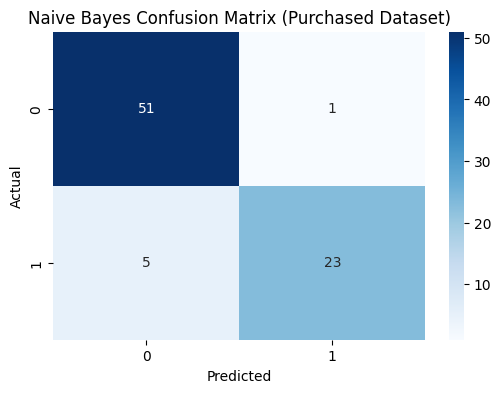


Phân bố dự đoán trên test set:
 0    56
1    24
Name: count, dtype: int64

=== Hoàn thành! ===
Lưu ý: Nếu accuracy thấp, dataset nhỏ nên dùng cross-validation. GaussianNB phù hợp vì features numerical.


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # GaussianNB cho numerical features
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Tải dữ liệu với debug
df = pd.read_csv('/content/Customer_Behaviour.csv')  # Đường dẫn của bạn

print("Tên các cột:", df.columns.tolist())
print("5 dòng đầu:\n", df.head())
print("\nKiểu dữ liệu:\n", df.dtypes)
print("\nSố lượng missing values:\n", df.isnull().sum())
print("Shape:", df.shape)  # Mong đợi ~ (400, 5)

# Drop columns không liên quan AN TOÀN (chỉ nếu tồn tại)
cols_to_drop = ['Id']  # Dataset này có 'Id', không có 'RowNumber' etc.
existing_cols = [col for col in cols_to_drop if col in df.columns]
if existing_cols:
    df = df.drop(existing_cols, axis=1)
    print(f"Đã drop: {existing_cols}")
else:
    print("Không có columns cần drop.")

# Xác định target: Ưu tiên 'Purchased', fallback cột cuối nếu binary
if 'Purchased' in df.columns:
    target_col = 'Purchased'
elif len(df.columns) > 0 and df.iloc[:, -1].nunique() == 2:
    target_col = df.columns[-1]
    print(f"Cảnh báo: Không tìm thấy 'Purchased', dùng cột '{target_col}' làm target.")
else:
    raise ValueError("Không tìm thấy cột target binary! Kiểm tra file dữ liệu.")

features = df.drop(target_col, axis=1)
target = df[target_col]

print(f"\nTarget column: {target_col}")
print(f"Phân bố target: \n{target.value_counts()}")

# 2. Tiền xử lý: Xử lý missing và encode categorical
# Điền missing values (nếu có)
for col in features.columns:
    if features[col].dtype == 'object':  # Categorical
        features[col].fillna(features[col].mode()[0], inplace=True)
    else:  # Numerical
        features[col].fillna(features[col].median(), inplace=True)

# Encode categorical columns (ví dụ: Gender)
label_encoders = {}
for col in features.columns:
    if features[col].dtype == 'object':
        le = LabelEncoder()
        features[col] = le.fit_transform(features[col])
        label_encoders[col] = le
        print(f"Encoded column '{col}': Unique values after: {features[col].nunique()}")

print("\nFeatures sau tiền xử lý:\n", features.dtypes)

# 3. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 4. Xây dựng Naive Bayes (GaussianNB cho numerical/encoded features)
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("\n=== Naive Bayes Results ===")
print("NB Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Naive Bayes Confusion Matrix ({target_col} Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tóm tắt phân bố dự đoán
print("\nPhân bố dự đoán trên test set:\n", pd.Series(nb_pred).value_counts())

print("\n=== Hoàn thành! ===")
print("Lưu ý: Nếu accuracy thấp, dataset nhỏ nên dùng cross-validation. GaussianNB phù hợp vì features numerical.")

## BÀI 2.3.4:

NB Accuracy: 0.8073846153846154
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       843
           1       0.91      0.66      0.77       782

    accuracy                           0.81      1625
   macro avg       0.83      0.80      0.80      1625
weighted avg       0.83      0.81      0.80      1625



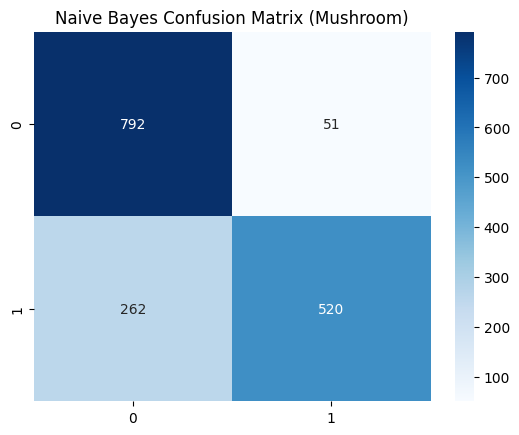

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer  # Để vectorize categorical
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tải dữ liệu
df = pd.read_csv('mushrooms.csv')  # Thay đường dẫn
le_class = LabelEncoder()
df['class'] = le_class.fit_transform(df['class'])  # e=0, p=1 (poison)

# Encode tất cả categorical features
le_dict = {}
for col in df.columns[1:]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

features = df.drop('class', axis=1)
target = df['class']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 2. Xây dựng MultinomialNB (phù hợp categorical)
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("NB Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix (Mushroom)')
plt.show()